# ImageDataGenerator 연습

## ImageDataGenerator 생성


In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 경로 설정
train_dir = '/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small/validation'
test_dir = '/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small/test'

# ImageDataGenerator 객체 생성 (MinMaxScaling 정규화 기능 포함) 
# 픽셀값: RGB(0~255) 3채널을 가지는 3차원 데이터
train_datagen = ImageDataGenerator(rescale=1/255) 
validation_datagen = ImageDataGenerator(rescale=1/255)

# 디렉토리로부터 데이터 가져오기 (-> ImageDataGenerator 객체에 설정 부여)
# 최종적인 이미지에 대한 픽셀 데이터 생성기 
train_generator = train_datagen.flow_from_directory(
    train_dir,               # target directory
    classes=['cats','dogs'], # label: [0, 1]
    target_size=(150,150),   # 이미지 리사이즈 
    batch_size=20,           # 배치 사이즈 
    class_mode='binary'      # 분류 종류
) 

# Validation Data에도 동일 적용
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,          # target directory
    classes=['cats','dogs'], # label: [0, 1]
    target_size=(150,150),   # 이미지 리사이즈 
    batch_size=20,           # 배치 사이즈 
    class_mode='binary'      # 분류 종류
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## ImageDataGenerator 사용

(20, 150, 150, 3)
(20,)


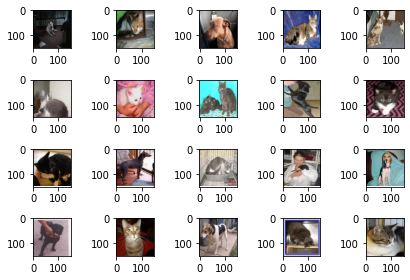

In [2]:
# 이미지에 대한 픽셀 데이터와 레이블을 튜플 형태로 출력
for x_data, t_data in train_generator: # 20개
    print(x_data.shape) # (20, 150, 150, 3) =(이미지 개수, 세로, 가로, 채널)
    print(t_data.shape) # (20,); 1차원 벡터
    break # ImageDataGenerator의 무한 반복 방지

# 픽셀 데이터 이미지화
fig = plt.figure()
fig_arr = list()
for i in range(20):
  fig_arr.append(fig.add_subplot(4,5,i+1))

for data_batch, label_batch in train_generator:
  for idx, img_data in enumerate(data_batch):
    fig_arr[idx].imshow(img_data)
  break;

fig.tight_layout()
plt.show()

# Cats & Dogs

## Library

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## CNN (Keras)

In [7]:
model = Sequential()

# INPUT LAYER + CONVOLUTION LAYER 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))

# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

# CONVOLUTION LAYER, POOLING LAYER 반복
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# FC LAYER
model.add(Flatten())

# HIDDEN LAYER (option)
# model.add(Dense(units=512, activation='relu'))

# DROPOUT LAYER
model.add(Dropout(rate=0.5))

# OUTPUT LAYER
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

# OPTIMIZER
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# LEARNING
history = model.fit(train_generator,     # train_generator: x_data, t_data를 같이 뽑아줌
                    steps_per_epoch=100, # 2000개 데이터를 1epoch 돌때 train_generator가 20개씩 학습
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [9]:
# 모델 저장
model.save('/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small_cnn_tf2.4.h5')

## Evaluation

{'loss': [0.6914848685264587, 0.674422025680542, 0.6523445248603821, 0.626501202583313, 0.5981732606887817, 0.5685571432113647, 0.5531383752822876, 0.5324209332466125, 0.5246179699897766, 0.5008182525634766, 0.4841462969779968, 0.4768635928630829, 0.4624558985233307, 0.44683822989463806, 0.4367036819458008, 0.42578527331352234, 0.4225274622440338, 0.4123353660106659, 0.40859928727149963, 0.40313127636909485, 0.37498220801353455, 0.38118135929107666, 0.36270520091056824, 0.3583635091781616, 0.3485696315765381, 0.3396051228046417, 0.3268927335739136, 0.32574301958084106, 0.31950119137763977, 0.30919575691223145], 'accuracy': [0.5285000205039978, 0.5855000019073486, 0.609499990940094, 0.6495000123977661, 0.6790000200271606, 0.7149999737739563, 0.7319999933242798, 0.7429999709129333, 0.7415000200271606, 0.7519999742507935, 0.7789999842643738, 0.7730000019073486, 0.7860000133514404, 0.7950000166893005, 0.7994999885559082, 0.809499979019165, 0.8084999918937683, 0.8115000128746033, 0.81800001

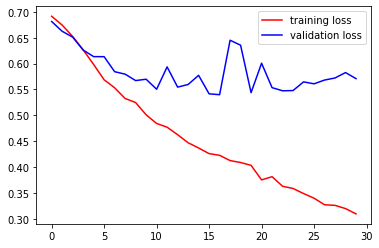

In [16]:
# history 객체 조사
print(history.history)
print(type(history.history))

print(history.history.keys())

# 과대적합 확인
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss =history.history['loss']
val_loss =history.history['val_loss']

plt.plot(train_loss, color='r', label='training loss')
plt.plot(val_loss, color='b', label='validation loss')
plt.legend()
plt.show()

# Data Augmentation

## Data Augmentation 연습

(150, 150, 3)
(1, 150, 150, 3)


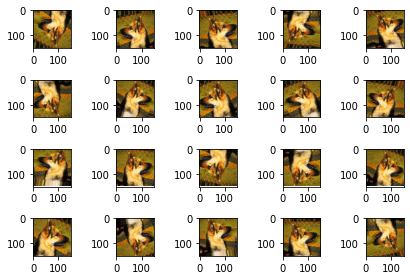

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 이미지 데이터 증식
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True
)

# 이미지 객체
img = image.load_img('/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small/train/dogs/dog.107.jpg',
                     target_size=(150,150))

# 넘파이 배열로 변경
x = image.img_to_array(img)
print(x.shape) # (150, 150, 3)

# 차원 변경
x = x.reshape((1,) + x.shape)
print(x.shape) # (1: 이미지 개수, 150, 150, 3)

# 증식된 이미지 데이터 확인
fig = plt.figure()
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1): # 데이터가 한개이므로 배치 사이즈는 1로 설정
    fig_arr[idx].imshow(image.array_to_img(batch[0])) # batch: 이미지 객체, batch[0]: 픽셀 정보
    idx += 1

    if idx % 20 == 0: # 이미지 한 개를 20번 반복하면서 데이터를 20개로 증식
      break

fig.tight_layout()
plt.show()
  

## Cats & Dogs

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


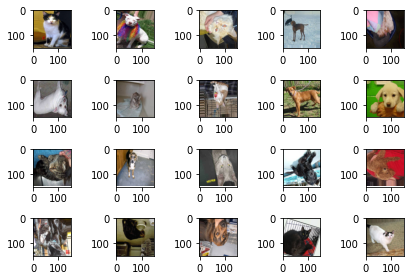

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small/validation'
test_dir = '/content/drive/MyDrive/ML Colab/data/CAT_DOG/cat_dog_small/test'

# 학습용 데이터: 정규화 + 데이터 증식
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True) 

# 평가용 데이터: 정규화
validation_datagen = ImageDataGenerator(rescale=1/255)

# 증식된 이미지 데이터 가져오기
train_generator = train_datagen.flow_from_directory(
    train_dir,               # target directory
    classes=['cats','dogs'], # label: [0, 1]
    target_size=(150,150),   # 이미지 리사이즈 
    batch_size=20,           # 배치 사이즈 
    class_mode='binary'      # 분류 종류
) 

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,          # target directory
    classes=['cats','dogs'], # label: [0, 1]
    target_size=(150,150),   # 이미지 리사이즈 
    batch_size=20,           # 배치 사이즈 
    class_mode='binary'      # 분류 종류
)

for x_data, t_data in train_generator: # 20개
    print(x_data.shape) # (20, 150, 150, 3) =(이미지 개수, 세로, 가로, 채널)
    print(t_data.shape) # (20,); 1차원 벡터
    break # ImageDataGenerator의 무한 반복 방지

# 픽셀 데이터 이미지화
fig = plt.figure()
fig_arr = list()
for i in range(20):
  fig_arr.append(fig.add_subplot(4,5,i+1))

for data_batch, label_batch in train_generator:
  for idx, img_data in enumerate(data_batch):
    fig_arr[idx].imshow(img_data)
  break;

fig.tight_layout()
plt.show()

## 모델 다시 학습

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# INPUT LAYER + CONVOLUTION LAYER 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))

# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

# CONVOLUTION LAYER, POOLING LAYER 반복
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# FC LAYER
model.add(Flatten())

# HIDDEN LAYER (option)
# model.add(Dense(units=512, activation='relu'))

# DROPOUT LAYER
model.add(Dropout(rate=0.5))

# OUTPUT LAYER
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

# OPTIMIZER
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# LEARNING
history = model.fit(train_generator,     
                    steps_per_epoch=100, 
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

## 증신된 데이터로 학습 후 Overfitting 확인

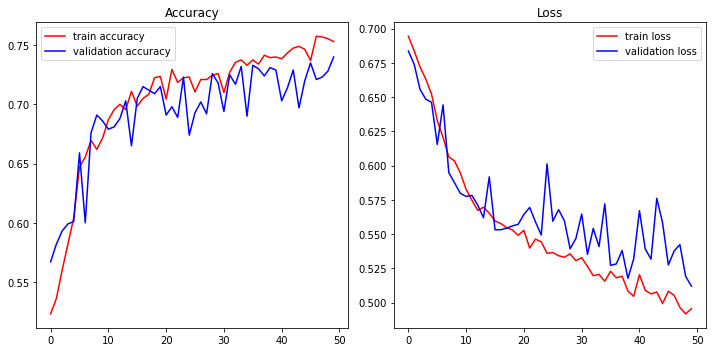

In [5]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

result_fig = plt.figure(figsize=(10,5))
fig_1 = result_fig.add_subplot(1,2,1)
fig_2 = result_fig.add_subplot(1,2,2)

fig_1.plot(train_acc, c='r', label='train accuracy')
fig_1.plot(val_acc, c='b', label='validation accuracy')

fig_2.plot(train_loss, c='r', label='train loss')
fig_2.plot(val_loss, c='b', label='validation loss')

fig_1.legend()
fig_1.set_title('Accuracy')
fig_2.legend()
fig_2.set_title('Loss')
plt.tight_layout()
plt.show()